# Project description

If the price of a product set too high, customers will stop buying it. If the price is set too low, customers may assume the quality to be poor. This idea applies to Airbnb. It is unclear how much of a premium one should pay per holiday. I will build a price estimator for Airbnb that can help Vancouver home providers reach an equilibrium price that optimizes their profits and affordability.

Task Feature Description:

- Accommodates: Maximum number of renters

- Bathrooms: Number of bathrooms

- Neighborhood: Name of the neighborhood

- Num_beds: Number of beds provided

- Property_type: The type of the property e.g. houses and apartments

- Price: Rental cost per night per person



## Importing the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##  Importing the Data

In [2]:
dataset = pd.read_csv('airbnb data.csv')
pd.DataFrame(dataset)

,Unnamed: 0,accommodates,bathrooms,neighbourhood,num_beds,price,property_type
0,0,1.0,1.0,Kitsilano,1,39,Apartment
1,1,1.0,1.0,Kensington-Cedar Cottage,1,43,Townhouse
2,2,2.0,1.0,Dunbar-Southlands,1,20,Apartment
3,3,3.0,1.0,Fraserview,1,49,Bed and breakfast
4,4,2.0,1.0,Oakridge,1,49,Villa
...,...,...,...,...,...,...,...
405,400,5.0,2.5,Kitsilano,5,249,House
406,404,4.0,1.0,Mount Pleasant,5,224,House
407,406,6.0,1.5,Riley Park,5,220,House
408,10,6.0,1.0,Downtown Vancouver,1,13,Condominium


# A Quick Review of the Data

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     410 non-null    int64  
 1   accommodates   409 non-null    float64
 2   bathrooms      410 non-null    float64
 3   neighbourhood  409 non-null    object 
 4   num_beds       410 non-null    int64  
 5   price          410 non-null    int64  
 6   property_type  410 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 22.5+ KB


# Removing duplicates

In [4]:
# Let us take a look at the total number of duplicate rows in the dataset
(dataset.duplicated()).sum()

1

In [9]:
# Let us take a look at the total number of non-duplicate rows in the dataset
(~dataset.duplicated()).sum()

409

So, we have only one duplicate row.

In [10]:
# Let us now remove the the only duplicated row 
# We can set the argumentinplace=True to remove duplicates from the original dataset.
dataset.drop_duplicates(inplace=True)


In [11]:
#checking the dataset
pd.DataFrame(dataset)

,Unnamed: 0,accommodates,bathrooms,neighbourhood,num_beds,price,property_type
0,0,1.0,1.0,Kitsilano,1,39,Apartment
1,1,1.0,1.0,Kensington-Cedar Cottage,1,43,Townhouse
2,2,2.0,1.0,Dunbar-Southlands,1,20,Apartment
3,3,3.0,1.0,Fraserview,1,49,Bed and breakfast
4,4,2.0,1.0,Oakridge,1,49,Villa
...,...,...,...,...,...,...,...
404,398,7.0,3.0,Grandview-Woodland,5,234,House
405,400,5.0,2.5,Kitsilano,5,249,House
406,404,4.0,1.0,Mount Pleasant,5,224,House
407,406,6.0,1.5,Riley Park,5,220,House


We can see that the duplicate row was removed succcesfuly and the number of rows in the dataset is now 409.


In [12]:
# Another check:
#Let us take a look at the total number of non-duplicate rows in the dataset using the oeprator ~
(~dataset.duplicated()).sum() 

409

# Dropping records (observations) with missing values

In [13]:
# Checking if the dataset contains any NULL values
dataset.isnull().any().any()

True

In [14]:
# A quick review of the data to find where the missing values are :
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 409 entries, 0 to 409
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     409 non-null    int64  
 1   accommodates   408 non-null    float64
 2   bathrooms      409 non-null    float64
 3   neighbourhood  408 non-null    object 
 4   num_beds       409 non-null    int64  
 5   price          409 non-null    int64  
 6   property_type  409 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 25.6+ KB


From above, we can that we have a total of two missing values: one in "accommodates" colum and one in "neighbourhood" column

In [15]:
# Let us drop rows with missing values using dropna() function  
dataset.dropna(inplace=True)

In [16]:
#checking the dataset 
pd.DataFrame(dataset)

,Unnamed: 0,accommodates,bathrooms,neighbourhood,num_beds,price,property_type
0,0,1.0,1.0,Kitsilano,1,39,Apartment
1,1,1.0,1.0,Kensington-Cedar Cottage,1,43,Townhouse
2,2,2.0,1.0,Dunbar-Southlands,1,20,Apartment
3,3,3.0,1.0,Fraserview,1,49,Bed and breakfast
4,4,2.0,1.0,Oakridge,1,49,Villa
...,...,...,...,...,...,...,...
403,395,4.0,1.0,Mount Pleasant,5,240,House
404,398,7.0,3.0,Grandview-Woodland,5,234,House
405,400,5.0,2.5,Kitsilano,5,249,House
406,404,4.0,1.0,Mount Pleasant,5,224,House


From above, we can see that there was only one row with missing values, which was dropped.

# Seperate the input and the output

In [18]:
X = dataset.loc[:, ['accommodates','bathrooms','neighbourhood','num_beds','property_type']].values
y = dataset.loc[:, ['price']].values

In [19]:
pd.DataFrame(X)

,0,1,2,3,4
0,1.0,1.0,Kitsilano,1,Apartment
1,1.0,1.0,Kensington-Cedar Cottage,1,Townhouse
2,2.0,1.0,Dunbar-Southlands,1,Apartment
3,3.0,1.0,Fraserview,1,Bed and breakfast
4,2.0,1.0,Oakridge,1,Villa
...,...,...,...,...,...
403,4.0,1.0,Mount Pleasant,5,House
404,7.0,3.0,Grandview-Woodland,5,House
405,5.0,2.5,Kitsilano,5,House
406,4.0,1.0,Mount Pleasant,5,House


In [1719]:
pd.DataFrame(y)

,0
0,39
1,43
2,20
3,49
4,49
...,...
403,240
404,234
405,249
406,224


# Encoding Categorical data

We need to encode the "neighbourhood " & "property_type " columns using label encoding 

In [1720]:
# Showing the names of all the proprties types
pd.DataFrame( dataset['neighbourhood'].unique())

,0
0,Kitsilano
1,Kensington-Cedar Cottage
2,Dunbar-Southlands
3,Fraserview
4,Oakridge
5,Arbutus Ridge
6,Point Grey/University of British Columbia
7,Hastings-Sunrise
8,Downtown Vancouver
9,Grandview-Woodland


In [1721]:
# Showing the names of all the neighbourhoods
pd.DataFrame( dataset['property_type'].unique())

,0
0,Apartment
1,Townhouse
2,Bed and breakfast
3,Villa
4,Condominium
5,Guest suite
6,Bungalow
7,Loft
8,House


In [1722]:
#Label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])
X[:, 4] = le.fit_transform(X[:, 4])

In [1723]:
# Checking X
pd.DataFrame(X)

,0,1,2,3,4
0,1.0,1.0,15,1,0
1,1.0,1.0,13,1,7
2,2.0,1.0,7,1,0
3,3.0,1.0,9,1,1
4,2.0,1.0,18,1,8
...,...,...,...,...,...
403,4.0,1.0,17,5,5
404,7.0,3.0,11,5,5
405,5.0,2.5,15,5,5
406,4.0,1.0,17,5,5


# Feature scaling

For linear regression, it is not necessary since the "sklearn linear regression library" does it internally.

# Splitting the Dataset into the Training Set and Test Set

In [1724]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [1725]:
pd.DataFrame(X_train)

,0,1,2,3,4
0,5.0,1.0,22,4,5
1,6.0,1.0,14,4,5
2,5.0,2.5,11,5,5
3,2.0,1.0,17,2,3
4,2.0,1.0,17,2,3
...,...,...,...,...,...
321,4.0,2.0,15,4,5
322,2.0,1.0,6,3,3
323,6.0,2.0,20,2,3
324,1.0,1.0,15,1,0


In [1726]:
pd.DataFrame(X_test)

,0,1,2,3,4
0,4.0,1.0,26,3,3
1,2.0,1.0,12,3,3
2,3.0,1.0,24,3,3
3,4.0,1.0,20,4,5
4,3.0,1.0,20,2,3
...,...,...,...,...,...
77,2.0,1.0,17,2,3
78,1.0,1.0,6,1,3
79,2.0,1.0,6,2,3
80,2.0,1.0,6,1,3


In [1727]:
pd.DataFrame(y_train)

,0
0,198
1,188
2,224
3,77
4,91
...,...
321,171
322,126
323,98
324,37


In [1728]:
pd.DataFrame(y_test)

,0
0,144
1,125
2,115
3,168
4,94
...,...
77,91
78,45
79,100
80,29


# Applying Machine Learning 

## Multiple Linear Regression

We will use Multiple Linear Regression since we have more than one input variable

### Training the Multiple Linear Regression Model on the Training Set

In [1729]:
# Note: Sklearn "LinearRegression" module works for simple linear regression and multiple linear regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### Checking the Multiple Linear Regression Model with the Test set

In [1730]:
y_pred = regressor.predict(X_test)

In [1731]:
pd.DataFrame(y_pred)

,0
0,129.799991
1,128.835115
2,128.988444
3,176.420561
4,85.413808
...,...
77,84.668083
78,40.611009
79,85.392122
80,41.554200


In [1732]:
pd.DataFrame(y_test)

,0
0,144
1,125
2,115
3,168
4,94
...,...
77,91
78,45
79,100
80,29


### Measuring the Mutiple Linear Regression Model Performance Using RMSE
A typical performance measure for regression problems is the RMSE (Root Mean Square Error)

In [1733]:
# Root Mean Square Error (RMSE) is a standard way to measure the error 
# of a model in predicting quantitative data

# One way to assess how well a regression model fits a dataset is to 
# calculate the root mean square error, which is a metric that tells us 
# the average distance between the predicted values from the model and 
# the actual values in the dataset.
# Source: https://towardsdatascience.com/what-does-rmse-really-mean-806b65f2e48e#:~:text=Root%20Mean%20Square%20Error%20(RMSE)%20is%20a%20standard%20way%20to,model%20in%20predicting%20quantitative%20data.&text=This%20tells%20us%20heuristically%20that,the%20vector%20of%20observed%20values.

from sklearn.metrics import mean_squared_error

RMSE=(mean_squared_error(y_test,y_pred))**0.5
print('Mutiple Linear RMSE: ', RMSE)

Mutiple Linear RMSE:  11.927749959307393


Comment :


We know that the performance of a regression model is reported as an error in those predictions. We also know that a good fitting regression model is "usually one where the RMSE value is small. Please note the RMSE summarizes on average how close predcitions were to their actual values.

Using the mutiple regression model, we obtained a very good RMSE score of 11.92 for this dataset. At the end of the notebook, we will use artifical neural networks (ANN) to see if we can tune the hyper-paramertets in a way to lower the RMSE value.


### Using other measures for model performance

#### R square

In [1734]:
from sklearn.metrics import r2_score

In [1735]:
r2_score(y_test, y_pred)

0.9563758935874743

Comment:

R Square is a very good one. However, we should not only rely on the R sqaure metric since the metric does not take into account the problem of overfitting (i.e. overfitting  means that the model cannot generalize well on other datasets. In other words, overfitting means that the model does very well on the trainig set, but does very poorly on the test set).

That is, we considered the RMSE score.

### Using the Mutiple Linear Regression Model to Predict

In [1736]:
# Predicting the room price
# 1.0 for "accommodates"
# 1.0 for "bathrooms"
# 15  for  "neighbourhood"
# 1   for  "num_beds"
# 0   for "property_type"


room_price= regressor.predict(np.array([[   1 , 1 , 15 , 1 , 0   ]]))
print('The  room price  will be ', room_price)


The  room price  will be  [[36.43703829]]


In [1737]:
#Another prediction
room_price= regressor.predict(np.array([[   6 , 1.5 , 20 , 5 , 4   ]]))
print('The  room price  will be ', room_price)


The  room price  will be  [[221.18716101]]


In [1738]:
#Another prediction 
room_price= regressor.predict(np.array([[   1 , 1 , 12 , 1 , 0   ]]))
print('The  room price  will be ', room_price)


The  room price  will be  [[36.63450347]]


We can notice that the regressor model gives very good predicitons results. 

# Artifical neural network (ANN)

## Importing the Libraries

In [1739]:
import tensorflow as tf

## Feature Scaling

In [1740]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()


X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

y_train=sc_y.fit_transform(y_train)
y_test= sc_y.transform(y_test)


In [1741]:
pd.DataFrame(X_train)

,0,1,2,3,4
0,0.938395,-0.490832,1.769192,1.025013,1.250899
1,1.468580,-0.490832,0.453147,1.025013,1.250899
2,0.938395,2.221224,-0.040369,1.877447,1.250899
3,-0.652160,-0.490832,0.946664,-0.679855,-0.290852
4,-0.652160,-0.490832,0.946664,-0.679855,-0.290852
...,...,...,...,...,...
321,0.408210,1.317205,0.617653,1.025013,1.250899
322,-0.652160,-0.490832,-0.862898,0.172579,-0.290852
323,1.468580,1.317205,1.440181,-0.679855,-0.290852
324,-1.182345,-0.490832,0.617653,-1.532289,-2.603477


In [1742]:
pd.DataFrame(y_train)

,0
0,1.382453
1,1.201151
2,1.853837
3,-0.811297
4,-0.557475
...,...
321,0.892938
322,0.077081
323,-0.430564
324,-1.536503


## Building the ANN Model
For regression problem involving predicting a single numerical value, the output layer must have a single node and uses the default or linear activation function (no activation function). The 'mean squared error' loss is minimized when fitting the model.

Also , we cannot calculate accuracy for regression problems. We only calculate accuracy for classification problems.

### Initializing the ANN

In [1743]:
Model = tf.keras.models.Sequential()

### Adding the Input Layer

In [1744]:
Model.add(tf.keras.layers.Dense(units=5, input_dim=5, activation='relu' ))

### Adding Hidden layers

In [1745]:
Model.add(tf.keras.layers.Dense(units=3, activation='relu'))
#Model.add(tf.keras.layers.Dense(units=1, activation='relu' ))

### Adding the Output Layer
Remember that in ANN Regression, our output is just one number.

In [1746]:
Model.add(tf.keras.layers.Dense(units=1))

### Compiling the ANN

In [1747]:
#opt = tf.keras.optimizers.Adam()
opt = tf.keras.optimizers.SGD()
Model.compile(loss='mean_squared_error', optimizer=opt)

### Training the ANN

In [1748]:
history = \
Model.fit(X_train, y_train, \
             validation_split=0.2, batch_size=32, \
             epochs=120)

Epoch 1/120
9/9 [==============================] - 0s 11ms/step - loss: 0.9972 - val_loss: 0.7146
Epoch 2/120
9/9 [==============================] - 0s 3ms/step - loss: 0.6847 - val_loss: 0.5667
Epoch 3/120
9/9 [==============================] - 0s 3ms/step - loss: 0.5604 - val_loss: 0.5016
Epoch 4/120
9/9 [==============================] - 0s 3ms/step - loss: 0.4940 - val_loss: 0.4455
Epoch 5/120
9/9 [==============================] - 0s 3ms/step - loss: 0.4459 - val_loss: 0.4053
Epoch 6/120
9/9 [==============================] - 0s 3ms/step - loss: 0.4104 - val_loss: 0.3784
Epoch 7/120
9/9 [==============================] - 0s 4ms/step - loss: 0.3841 - val_loss: 0.3833
Epoch 8/120
9/9 [==============================] - 0s 3ms/step - loss: 0.3620 - val_loss: 0.3384
Epoch 9/120
9/9 [==============================] - 0s 3ms/step - loss: 0.3373 - val_loss: 0.3282
Epoch 10/120
9/9 [==============================] - 0s 3ms/step - loss: 0.3152 - val_loss: 0.3038
Epoch 11/120
9/9 [==========

### Visualize the model

In [1749]:
Model.summary()

Model: "sequential_54"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_174 (Dense)            (None, 5)                 30        
_________________________________________________________________
dense_175 (Dense)            (None, 3)                 18        
_________________________________________________________________
dense_176 (Dense)            (None, 1)                 4         
Total params: 52
Trainable params: 52
Non-trainable params: 0
_________________________________________________________________


### Evaluating the Model

#### Prediction on the Test Set

In [1750]:
y_pred = Model.predict(X_test)

In [1751]:
pd.DataFrame(y_test)

,0
0,0.403424
1,0.058951
2,-0.122351
3,0.838548
4,-0.503084
...,...
77,-0.557475
78,-1.391462
79,-0.394303
80,-1.681545


In [1752]:
pd.DataFrame(y_pred)

,0
0,0.229960
1,-0.041021
2,0.049326
3,0.983772
4,-0.781546
...,...
77,-0.863303
78,-0.970746
79,-0.658214
80,-0.897393


####  Measuring the ANN Model Performance Using RMSE

In [1753]:
from sklearn.metrics import mean_squared_error
RMSE=(mean_squared_error( sc_y.inverse_transform(y_test), sc_y.inverse_transform (y_pred)  ))**0.5
print('ANN RMSE: ', RMSE) 


ANN RMSE:  23.58416641241868


Comment:
    
The RMSE value using the ANN model is 13.53, which is good. We got this value after tuning some hyperparameters(i.e. learning rate, number of layers, number of input for each hidden layer, etc).

In [1754]:
########## Finding the MSE manually (Optional) ########## 
MSE=(mean_squared_error( y_test, y_pred))
print('ANN MSE: ', MSE) 


ANN MSE:  0.1828287445159674


In [1755]:
###########  Using Keras library to find the MSE (Optional) ########## 
Model.evaluate(X_test,y_test)

3/3 [==============================] - 0s 1ms/step - loss: 0.1828


0.18282873928546906

In [1756]:
########## Finding the RMSE manually (Optional) ########## 
RMSE=(mean_squared_error( y_test, y_pred)) ** 0.5
print('ANN MSE: ', RMSE) 


ANN MSE:  0.4275847805008586


#### Measuring the ANN Model Performance Using R square

In [1757]:
r2_score(y_test, y_pred)

0.8294504552747375

R sqaure is a very good value. It is close 0.95.

###  Plotting the Learning Curve
-Learning curves are a plot of neural network model performance over time, such as calculated at the end of each training epoch. Plots of learning curves provide insight into the learning dynamics of the model, such as whether the model is learning well, whether it is underfitting the training dataset, or whether it is overfitting the training dataset.

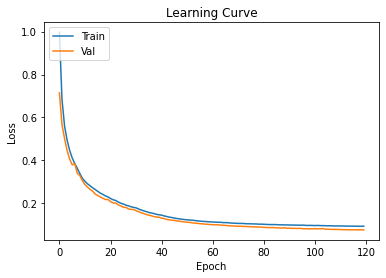

In [1758]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Learning Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Val'], loc='upper left')

plt.show()

From the above graph, we can see that model shows a "good fit" since:

-The plot of training loss decreases to a point of stability.

-The plot of validation loss decreases to a point of stability and has a small gap with the training loss.


Source: https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/

##  Using ANN to make room price predicitons 

In [1759]:
# Predicting the room price
# 1.0 for "accommodates"
# 1.0 for "bathrooms"
# 15  for  "neighbourhood"
# 1   for  "num_beds"
# 0   for "property_type"

predicted_price_sclaed=Model.predict(  sc_X.transform( [[   1 , 1 , 15 , 1 , 0   ]] )   )

print (predicted_price_sclaed)
predicted_price_unscaled= sc_y.inverse_transform (predicted_price_sclaed)
print('The  room price  will be ', room_price)



[[-1.3051789]]
The  room price  will be  [[36.63450347]]


In [1760]:
predicted_price_sclaed=Model.predict(  sc_X.transform( [[    6 , 1.5 , 10 , 5 , 4    ]] )   )

print (predicted_price_sclaed)
predicted_price_unscaled= sc_y.inverse_transform (predicted_price_sclaed)
print('The  room price  will be ', room_price)


[[1.9195561]]
The  room price  will be  [[36.63450347]]


In [1761]:
predicted_price_sclaed=Model.predict(  sc_X.transform( [[   1 , 1 , 12 , 1 , 0    ]] )   )

print (predicted_price_sclaed)
predicted_price_unscaled= sc_y.inverse_transform (predicted_price_sclaed)
print('The  room price  will be ', room_price)


[[-1.2573442]]
The  room price  will be  [[36.63450347]]
